<a href="https://colab.research.google.com/github/Marvel280904/W1-DataMining-Marvel/blob/main/%5BJawaban%5D_Supermarket_December_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Strategy to Boost Supermarket Sales in January

As the manager of a supermarket in Surabaya, I find myself at a crossroads as we step into January. The new year has just begun, and I am eager to understand how my supermarket has been performing. My office is filled with stacks of transaction data from our customers, brimming with numbers, percentages, and seemingly endless combinations of products. Yet, I feel lost amidst the overwhelming data.

The challenge is clear: I need **insights on what is truly happening in my supermarket**. What are the purchasing patterns of my customers? Which products are flying off the shelves, and which ones are barely noticed? More importantly, **how can I use this information to optimize the layout of the store and boost sales this year**?

In January, **the store layout is the first thing I want to focus on**. Customers are navigating through the aisles, but I want to ensure they’re being guided to the right places. I wonder: Should I place complementary products closer together? Should I create specific zones to attract customers? For instance, should shampoos be next to toothpaste or near body soaps? Should snacks and drinks be closer together to encourage impulse buys?

The only thing I have right now is the [raw transaction data](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx). It tells me what customers bought, but I need help deciphering it. **Are there certain product combinations that people frequently buy together?** For example, do people who buy detergents also pick up fabric softeners? Do snacks and beverages have a strong pairing trend?

I need your expertise to dig into this data and uncover patterns. Once we understand what products customers often buy together, I can rearrange the store layout to make it more intuitive and appealing. This way, I can improve the shopping experience for my customers while also increasing the chances of cross-selling and boosting sales.

Let’s uncover the story behind the numbers and make data-driven decisions that will set my supermarket up for success in this new year. Help me turn this chaotic dataset into a clear strategy that drives results!

### Grading

1. Understanding the Data (50 points)


*   Key Metrics (0/10/15/25 points): Identifies useful insights, eg: top-selling products, etc.
*   Seasonal Insights (0/10/15/25 points): Explains trends for January, highlighting any seasonal demands or anomalies in customer behavior.
<br>
<br>

2. Recommending Layout Improvements (50 points)

*   Market Basket Analysis Insights (0/10/15/25 points): Uses association rules to determine logical groupings of products.
*   Placement Ideas (0/10/15/25 points): Provides actionable layout changes idea to increase cross-selling opportunities, such as adjusting the location of high-demand complementary items, eg:
If "Shampoo" is frequently bought with "Soap," they should be placed near each other.




In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
!pip install mlxtend==0.23.1
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = "https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx"
df = pd.read_excel(url)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KD_SBR,TP_TRN,KDSUP,KAS,TRN_DK,GDG,GGD,KDSLS,KEL,ITEM,...,DEP_SWA,GON,KONS,POST_STOK,STATUS,TP_ADJ,USER,TANGGAL,JAM,LAMA_CRD
0,IN,JUL,NaN,6.0,K,A,AREA,NaN,KERTAS,39390.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:12:02,NaN
1,IN,JUL,NaN,6.0,K,A,AREA,NaN,BTL/DOT,13108.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:24:51,NaN
2,IN,JUL,NaN,6.0,K,A,AREA,NaN,MUSTIKA,5644.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:18,NaN
3,IN,JUL,NaN,6.0,K,A,AREA,NaN,SABUN.C,7273.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:22,NaN
4,IN,JUL,NaN,6.0,K,A,AREA,NaN,LULURMD,12168.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:20,NaN


In [ ]:
df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 61 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   KD_SBR      148486 non-null  object        
 1   TP_TRN      148486 non-null  object        
 2   KDSUP       40832 non-null   float64       
 3   KAS         136294 non-null  float64       
 4   TRN_DK      148486 non-null  object        
 5   GDG         148486 non-null  object        
 6   GGD         148486 non-null  object        
 7   KDSLS       0 non-null       float64       
 8   KEL         148486 non-null  object        
 9   ITEM        148486 non-null  float64       
 10  NAMA        148486 non-null  object        
 11  BIN         13586 non-null   float64       
 12  KDBIN       0 non-null       float64       
 13  TGL_TRANS   148486 non-null  datetime64[ns]
 14  NO_BKT      148486 non-null  object        
 15  NO_ORD      0 non-null       float64       
 16  ST

In [ ]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KDSUP,KAS,KDSLS,ITEM,BIN,KDBIN,TGL_TRANS,NO_ORD,SLD_AK,SLD_AKG,...,PTS_GDG,PTS_KEL,PTS_ITEM,QTY_PTS,TGL_OLD,FILLER,SUPPLIER,DEP_SWA,TANGGAL,LAMA_CRD
count,40832.000000,136294.000000,0.0,148486.000000,13586.000000,0.0,148486,0.0,11769.000000,9350.000000,...,0.0,0.0,0.0,0.0,8847,1.484860e+05,7264.000000,1668.000000,148486,37.0
mean,650.873384,4.497381,NaN,21322.181445,8.858531,NaN,2017-01-15 21:02:24.159045376,NaN,20.819228,15.819209,...,NaN,NaN,NaN,NaN,2016-12-07 05:29:26.429297920,1.717615e+11,313.185573,1.182854,2017-01-15 21:34:32.486295296,0.0
min,0.000000,1.000000,NaN,1.000000,1.000000,NaN,2017-01-01 00:00:00,NaN,-12.000000,-12.000000,...,NaN,NaN,NaN,NaN,2013-09-24 00:00:00,1.701010e+11,0.000000,1.000000,2017-01-01 00:00:00,0.0
25%,30.000000,3.000000,NaN,5221.000000,6.000000,NaN,2017-01-07 00:00:00,NaN,0.000000,0.000000,...,NaN,NaN,NaN,NaN,2016-12-01 00:00:00,1.701077e+11,8.000000,1.000000,2017-01-07 00:00:00,0.0
50%,999.000000,5.000000,NaN,13839.000000,8.000000,NaN,2017-01-15 00:00:00,NaN,3.000000,2.000000,...,NaN,NaN,NaN,NaN,2016-12-22 00:00:00,1.701160e+11,69.000000,1.000000,2017-01-16 00:00:00,0.0
75%,999.000000,6.000000,NaN,35802.750000,13.000000,NaN,2017-01-25 00:00:00,NaN,13.000000,11.000000,...,NaN,NaN,NaN,NaN,2017-01-05 00:00:00,1.701251e+11,444.000000,1.000000,2017-01-25 00:00:00,0.0
max,1769.000000,15.000000,NaN,700047.000000,19.000000,NaN,2017-01-31 00:00:00,NaN,2663.000000,1748.000000,...,NaN,NaN,NaN,NaN,2017-01-31 00:00:00,7.013157e+11,1769.000000,2.000000,2017-02-01 00:00:00,0.0
std,467.837803,1.906136,NaN,25881.022963,4.537190,NaN,NaN,NaN,70.033381,54.576439,...,NaN,NaN,NaN,NaN,NaN,2.951083e+10,463.993685,0.386662,NaN,0.0


In [ ]:
# Menampilkan semua kolom meskipun ada banyak
pd.set_option('display.max_rows', None)
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
KD_SBR,3
TP_TRN,3
KDSUP,107657
KAS,12195
TRN_DK,3
GDG,3
GGD,3
KDSLS,148489
KEL,3
ITEM,3


**Yang Saya Dapatkan Dari EDA Diatas**
1. Kelengkapan Data:

 - Sebagian besar kolom memiliki banyak nilai null atau kosong, seperti kolom KDSUP, BIN, PTS_GDG, JLH_DIS, dan NO_ORD, menunjukkan ketidakterpakaian atau kurangnya relevansi data tersebut.
 - Kolom dengan kelengkapan hampir penuh seperti KD_SBR, TP_TRN, KEL, NAMA, HRG_PKK, dan JLH_TRANS menunjukkan data yang penting dan dapat diandalkan untuk analisis lebih lanjut.

2. Distribusi Missing Values:

 - Kolom dengan hampir penuh missing values: KDSLS, KDBIN, PTS_ITEM, JLH_DIS, dll., kemungkinan tidak berguna untuk analisis karena tingkat missing values yang sangat tinggi.
 - Kolom dengan missing values sedang: KAS (12,195), STS_BYR (12,195), dan PPN (1,889), dapat dipertimbangkan untuk diisi dengan nilai tertentu (mean, median, atau modus).

3. Informasi Penting untuk Analisis:

 - Kolom Transaksi: NO_BKT, TGL_TRANS, NAMA, QTY, JLH_TRANS, dan HRG_PKK adalah kolom penting yang menunjukkan detail transaksi dan dapat digunakan untuk analisis pola pembelian atau performa produk.
 - Kolom Harga: HRG_PKK (Harga Pokok), HRG_JUL (Harga Jual), dan DISC (Diskon) penting untuk analisis profitabilitas.
 - Kolom Waktu: TGL_TRANS dan TANGGAL relevan untuk analisis temporal seperti pola pembelian harian atau musiman.

4. Anomali:

 - Beberapa kolom memiliki nilai yang selalu kosong (KDSLS, KDBIN, PTS_GDG, dll.), sehingga sebaiknya dihapus karena tidak memberikan kontribusi.
Kolom seperti LAMA_CRD hanya memiliki 37 nilai yang terisi, menunjukkan ketidaksesuaian atau ketidakrelevanan.

5. Volume Data:

 - Dataset memiliki 148,489 baris dan 61 kolom, dengan 39 kolom tipe numerik dan sisanya string atau datetime.
Ukuran memori sebesar 69.1 MB menandakan dataset ini cukup besar untuk diproses secara langsung.

Oleh karena itu saya akan drop kolom yang tidak perlu.

In [ ]:
# Daftar kolom yang dianggap tidak penting
unimportant_columns = [
    'KDSUP', 'TRN_DK', 'GDG', 'GGD', 'KDSLS', 'BIN', 'KDBIN', 'NO_ORD',
    'SLD_AK', 'SLD_AKG', 'HRG_OLD', 'HRGBL_OLD', 'DISC1', 'DISC2',
    'JLH_DIS', 'JLH_DIS1', 'JLH_DIS2', 'HRGJL_OLD', 'HRGJL1_OLD',
    'HRGJL2_OLD', 'SUPP_OLD', 'DISB1_OLD', 'DISB2_OLD', 'PPN_OLD',
    'PPNBM', 'PPNBM_OLD', 'PTS_GDG', 'PTS_KEL', 'PTS_ITEM', 'QTY_PTS',
    'TRNBL', 'POST', 'TGL_OLD', 'FILLER', 'SUPPLIER', 'DEP_SWA', 'GON',
    'KONS', 'POST_STOK', 'STATUS', 'TP_ADJ', 'USER', 'TANGGAL', 'JAM', 'LAMA_CRD'
]

# Menghapus kolom yang tidak penting
df.drop(unimportant_columns, axis=1, inplace=True)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KD_SBR,TP_TRN,KAS,KEL,ITEM,NAMA,TGL_TRANS,NO_BKT,STS_BYR,QTY,HRG_PKK,HRG_JUL,DISC,PPN,JLH_TRANS,KET_TRANS
0,IN,JUL,6.0,KERTAS,39390.0,KERTAS KADO SINAR DU,2017-01-02,060102001,CD,2.0,549.98,1100.0,0.0,0.0,2200.0,CASH DISCOUNT
1,IN,JUL,6.0,BTL/DOT,13108.0,PIGEON BTL PP RP 240,2017-01-02,060102002,CD,1.0,20640.45,23000.0,0.0,0.0,23000.0,CASH DISCOUNT
2,IN,JUL,6.0,MUSTIKA,5644.0,MR SEKAR TANJUNG KB,2017-01-02,060102003,CD,1.0,8720.00,9500.0,0.0,0.0,9500.0,CASH DISCOUNT
3,IN,JUL,6.0,SABUN.C,7273.0,BIORE BF 100ML WHITE,2017-01-02,060102003,CD,1.0,6215.00,6900.0,0.0,0.0,6900.0,CASH DISCOUNT
4,IN,JUL,6.0,LULURMD,12168.0,OVALE LULUR BALI BEN,2017-01-02,060102003,CD,1.0,12119.65,13500.0,0.0,0.0,13500.0,CASH DISCOUNT


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   KD_SBR     148486 non-null  object        
 1   TP_TRN     148486 non-null  object        
 2   KAS        136294 non-null  float64       
 3   KEL        148486 non-null  object        
 4   ITEM       148486 non-null  float64       
 5   NAMA       148486 non-null  object        
 6   TGL_TRANS  148486 non-null  datetime64[ns]
 7   NO_BKT     148486 non-null  object        
 8   STS_BYR    136294 non-null  object        
 9   QTY        148486 non-null  float64       
 10  HRG_PKK    148486 non-null  float64       
 11  HRG_JUL    148486 non-null  float64       
 12  DISC       146957 non-null  float64       
 13  PPN        146600 non-null  float64       
 14  JLH_TRANS  148486 non-null  float64       
 15  KET_TRANS  148486 non-null  object        
dtypes: datetime64[ns](1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KAS,ITEM,TGL_TRANS,QTY,HRG_PKK,HRG_JUL,DISC,PPN,JLH_TRANS
count,136294.000000,148486.000000,148486,148486.000000,148486.000000,148486.000000,146957.000000,146600.000000,1.484860e+05
mean,4.497381,21322.181445,2017-01-15 21:02:24.159045376,3.163174,19901.017212,21795.990560,0.437617,0.334158,6.137361e+04
min,1.000000,1.000000,2017-01-01 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,3.000000,5221.000000,2017-01-07 00:00:00,1.000000,3728.920000,4425.000000,0.000000,0.000000,5.800000e+03
50%,5.000000,13839.000000,2017-01-15 00:00:00,1.000000,8365.180000,9600.000000,0.000000,0.000000,1.270000e+04
75%,6.000000,35802.750000,2017-01-25 00:00:00,2.000000,17769.380000,20200.000000,0.000000,0.000000,3.060000e+04
max,15.000000,700047.000000,2017-01-31 00:00:00,2000.000000,720000.000000,900000.000000,50.000000,10.000000,3.778570e+07
std,1.906136,25881.022963,NaN,16.266576,38566.965857,40289.934102,2.475039,1.631778,3.981378e+05


In [ ]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
KD_SBR,3
TP_TRN,3
KAS,12195
KEL,3
ITEM,3
NAMA,3
TGL_TRANS,3
NO_BKT,3
STS_BYR,12195
QTY,3


In [ ]:
# Drop baris dengan nilai null hanya di kolom tertentu
columns_to_drop_null = ['KD_SBR', 'TP_TRN', 'KEL', 'ITEM', 'NAMA', 'TGL_TRANS', 'NO_BKT',
                        'QTY', 'HRG_PKK', 'HRG_JUL', 'JLH_TRANS', 'KET_TRANS']
df.dropna(subset=columns_to_drop_null, inplace=True)

# Mengisi nilai null di kolom lainnya
df['KAS'].fillna(df['KAS'].mode()[0], inplace=True)          # Mengisi dengan modus
df['STS_BYR'].fillna(df['STS_BYR'].mode()[0], inplace=True)  # Mengisi dengan modus
df['DISC'].fillna(df['DISC'].mean(), inplace=True)           # Mengisi dengan rata-rata
df['PPN'].fillna(df['PPN'].mode()[0], inplace=True)          # Mengisi dengan modus

df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-10-45c33eb491f9>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['KAS'].fillna(df['KAS'].mode()[0], inplace=True)          # Mengisi dengan modus
<ipython-inp

,0
KD_SBR,0
TP_TRN,0
KAS,0
KEL,0
ITEM,0
NAMA,0
TGL_TRANS,0
NO_BKT,0
STS_BYR,0
QTY,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-11-29cbf3b3c259>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


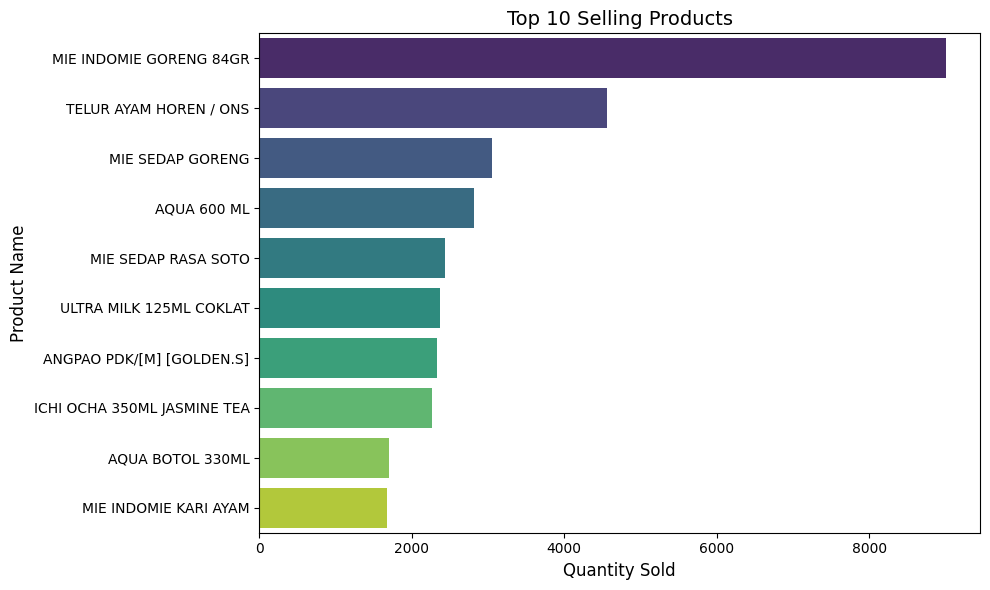

In [ ]:
# Menghitung total penjualan per produk
top_products = df.groupby('NAMA')['QTY'].sum().sort_values(ascending=False).head(10)

# Membuat bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Selling Products', fontsize=14)
plt.xlabel('Quantity Sold', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.tight_layout()
plt.show()

### Grafik bar horizontal menunjukkan 10 produk terlaris berdasarkan kuantitas yang terjual. Mie Indomie Goreng 84GR adalah produk dengan penjualan tertinggi, diikuti oleh Telur Ayam Horen / Ons. Penjualan produk lainnya lebih rendah dengan variasi yang signifikan.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


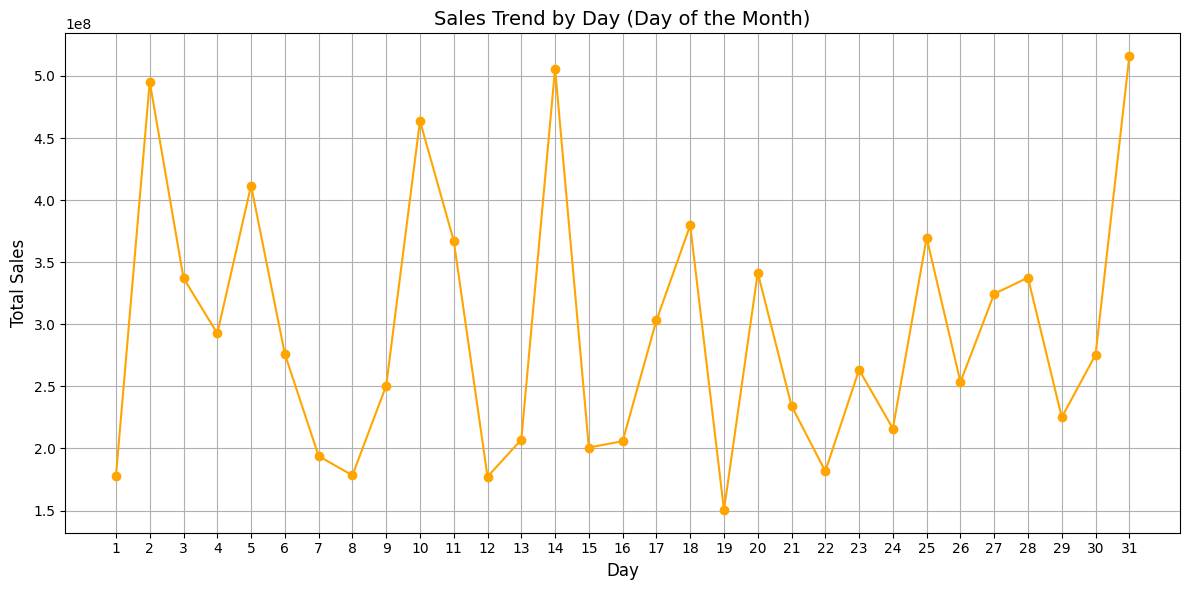

In [ ]:
# Mengonversi TGL_TRANS ke datetime jika belum dilakukan
df['TGL_TRANS'] = pd.to_datetime(df['TGL_TRANS'])

# Menambahkan kolom hari (hanya tanggal)
df['Day'] = df['TGL_TRANS'].dt.day

# Menghitung total transaksi berdasarkan tanggal (tanpa bulan/tahun)
daily_sales = df.groupby('Day')['JLH_TRANS'].sum().reset_index()

# Membuat line chart
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Day'], daily_sales['JLH_TRANS'], marker='o', color='orange', linestyle='-')
plt.title('Sales Trend by Day (Day of the Month)', fontsize=14)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True)
plt.xticks(range(1, 32))  # Karena maksimal tanggal adalah 31
plt.tight_layout()
plt.show()


### Grafik garis menunjukkan tren penjualan harian dalam satu bulan. Penjualan menunjukkan fluktuasi signifikan dengan puncak penjualan tertinggi pada hari ke-2, 10, dan 31. Pola ini mungkin terkait dengan promosi atau kebiasaan belanja pelanggan.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


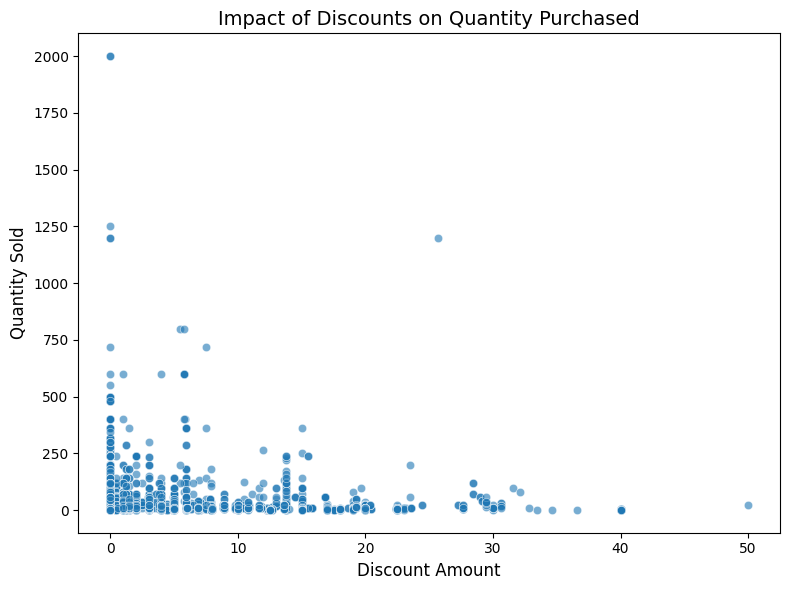

In [ ]:
# Scatter plot diskon vs jumlah barang
plt.figure(figsize=(8, 6))
sns.scatterplot(x='DISC', y='QTY', data=df, alpha=0.6)
plt.title('Impact of Discounts on Quantity Purchased', fontsize=14)
plt.xlabel('Discount Amount', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.tight_layout()
plt.show()

### Grafik scatter menunjukkan hubungan antara jumlah diskon dan kuantitas produk yang terjual. Distribusi data menunjukkan bahwa sebagian besar penjualan terjadi pada diskon kecil (0–10), dengan beberapa outlier (jumlah penjualan tinggi) pada diskon rendah. Hal ini mungkin menunjukkan diskon besar tidak selalu meningkatkan jumlah pembelian.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-22-1835630bef45>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_sales.index, y=payment_sales.values, palette='coolwarm')


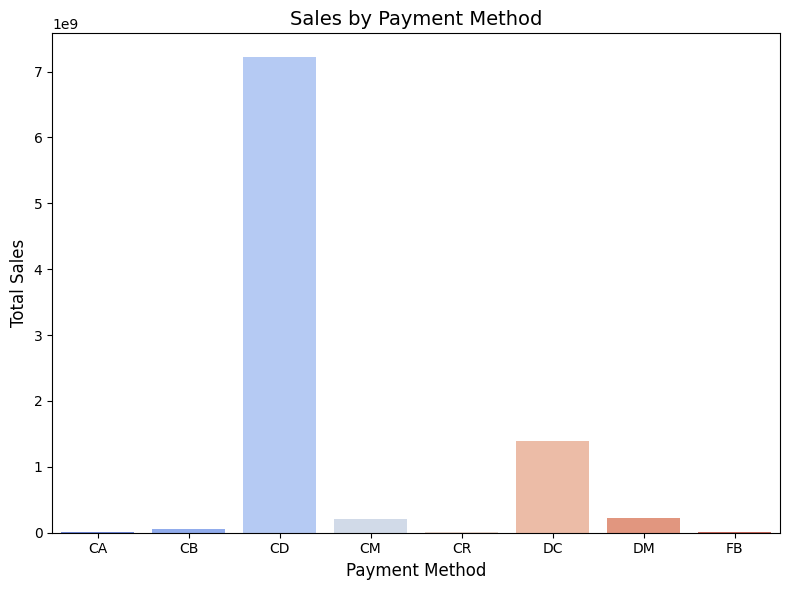

In [22]:
# Menghitung total penjualan per metode pembayaran
payment_sales = df.groupby('STS_BYR')['JLH_TRANS'].sum()

# Membuat bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=payment_sales.index, y=payment_sales.values, palette='coolwarm')
plt.title('Sales by Payment Method', fontsize=14)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.tight_layout()
plt.show()

1. CA (Cash): Pembayaran dengan uang tunai.
2. CB (Cashback): Pembayaran yang melibatkan pengembalian sebagian dana kepada pelanggan sebagai cashback.
3. CD (Credit Card): Pembayaran menggunakan kartu kredit.
4. CM (Credit Memo): Pembayaran atau penyesuaian menggunakan nota kredit.
5. CR (Credit Transfer): Transfer kredit antar rekening (misalnya, melalui bank atau metode digital).
6. DC (Debit Card): Pembayaran menggunakan kartu debit.
7. DM (Direct Money): Pembayaran langsung, seperti transfer uang secara instan.
8. FB (Financing/Billing): Pembayaran yang melibatkan pembiayaan atau penagihan, seperti melalui pihak ketiga atau skema cicilan.

Penjelasan:
Sumbu horizontal (X): Menampilkan berbagai metode pembayaran yang disingkat (CA, CB, CD, CM, CR, DC, DM, FB).
Sumbu vertikal (Y): Menunjukkan total penjualan dalam satuan tertentu (sepertinya dalam skala miliaran, 1e9).
Bar: Mewakili jumlah penjualan untuk masing-masing metode pembayaran, dengan tinggi batang menunjukkan nilai penjualan.

Observasi utama:
Metode pembayaran "CD" memiliki total penjualan tertinggi dibandingkan metode lainnya.
"DC" memiliki penjualan yang juga cukup signifikan.
Metode lainnya seperti "CA," "CB," dan "CM" memiliki penjualan yang relatif kecil.

In [21]:
# Group data by 'Transaction' and 'Item' and sum quantities
df['QTY'] = df.groupby(['NO_BKT', 'KEL'])['KEL'].transform('count')

# Drop duplicate rows to keep only one entry for each item per transaction
data = df.drop_duplicates(subset=['NO_BKT', 'KEL'])

# Create a pivot table to represent transactions
transaction_data = df.pivot_table(index='NO_BKT', columns='KEL', values='QTY', aggfunc='sum').fillna(0)

# Display the first few rows of the transaction data
display(transaction_data.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
0001/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0003/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0004/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0005/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Convert quantities to 1 and 0
transaction_data = transaction_data.applymap(lambda x: 1 if x > 0 else 0)

# Display the first few rows of the transaction data
display(transaction_data.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-16-f1091186c110>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transaction_data = transaction_data.applymap(lambda x: 1 if x > 0 else 0)


KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
0001/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0002/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0003/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0004/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0005/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Apply Apriori algorithm
frequent_itemsets = apriori(transaction_data, min_support=0.02, use_colnames=True)
frequent_itemsets_df = frequent_itemsets[['support', 'itemsets']]

display(frequent_itemsets_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.037991,(AIR.M)
1,0.032251,(ASESORS)
2,0.033590,(B DAPUR)
3,0.063600,(BISCPAK)
4,0.024106,(BTL/DOT)
5,0.032360,(COKLAT)
6,0.026593,(DDORANT)
7,0.083607,(DETERJN)
8,0.028507,(GULA)
9,0.021373,(HBL)


In [ ]:
# Apply Apriori algorithm
frequent_itemsets = apriori(transaction_data, min_support=0.02, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the association rules
display(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(SNACK),(BISCPAK),0.068984,0.063600,0.021974,0.318542,5.008515,0.017587,1.374112,0.859642
1,(BISCPAK),(SNACK),0.063600,0.068984,0.021974,0.345509,5.008515,0.017587,1.422504,0.854699
2,(DETERJN),(MIE),0.083607,0.078878,0.023259,0.278195,3.526894,0.016664,1.276137,0.781831
3,(MIE),(DETERJN),0.078878,0.083607,0.023259,0.294872,3.526894,0.016664,1.299612,0.777817
4,(SOFTENR),(DETERJN),0.042883,0.083607,0.027605,0.643722,7.699413,0.024019,2.572131,0.909105
5,(DETERJN),(SOFTENR),0.083607,0.042883,0.027605,0.330173,7.699413,0.024019,1.428902,0.949505
6,(DETERJN),(SUSU KT),0.083607,0.166503,0.023997,0.287022,1.723828,0.010076,1.169036,0.458205
7,(SUSU KT),(DETERJN),0.166503,0.083607,0.023997,0.144123,1.723828,0.010076,1.070707,0.503776
8,(P GIGI),(PAMPERS),0.076227,0.139718,0.020608,0.270348,1.934954,0.009958,1.179030,0.523064
9,(PAMPERS),(P GIGI),0.139718,0.076227,0.020608,0.147496,1.934954,0.009958,1.083600,0.561667


In [23]:
# Filter aturan dengan lift tinggi untuk menemukan produk komplementer
high_lift_rules = rules[rules['lift'] > 1.5]

# Menampilkan rekomendasi layout
for index, row in high_lift_rules.iterrows():
    print(f"Consider placing {list(row['antecedents'])} near {list(row['consequents'])}.")

Consider placing ['SNACK'] near ['BISCPAK'].
Consider placing ['BISCPAK'] near ['SNACK'].
Consider placing ['DETERJN'] near ['MIE'].
Consider placing ['MIE'] near ['DETERJN'].
Consider placing ['SOFTENR'] near ['DETERJN'].
Consider placing ['DETERJN'] near ['SOFTENR'].
Consider placing ['DETERJN'] near ['SUSU KT'].
Consider placing ['SUSU KT'] near ['DETERJN'].
Consider placing ['P GIGI'] near ['PAMPERS'].
Consider placing ['PAMPERS'] near ['P GIGI'].
Consider placing ['P GIGI'] near ['SABUN.M'].
Consider placing ['SABUN.M'] near ['P GIGI'].
Consider placing ['P GIGI'] near ['SHAMPOO'].
Consider placing ['SHAMPOO'] near ['P GIGI'].
Consider placing ['SABUN.M'] near ['PAMPERS'].
Consider placing ['PAMPERS'] near ['SABUN.M'].
Consider placing ['SHAMPOO'] near ['PAMPERS'].
Consider placing ['PAMPERS'] near ['SHAMPOO'].
Consider placing ['SABUN.M'] near ['SHAMPOO'].
Consider placing ['SHAMPOO'] near ['SABUN.M'].
Consider placing ['P GIGI', 'SHAMPOO'] near ['SABUN.M'].
Consider placing ['P 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### **Kesimpulan dan Interpretasi**

1. **Keterkaitan Produk:**
   - Beberapa pasangan produk memiliki keterkaitan kuat, seperti:
     - *SNACK* dan *BISCPAK* dengan nilai *confidence* tinggi (0.31 dan 0.34) serta *lift* yang signifikan (5.01). Ini menunjukkan bahwa pembelian *SNACK* sangat berkorelasi dengan *BISCPAK* dan sebaliknya.
     - *SOFTENR* dan *DETERJN* memiliki *confidence* 0.64 dan *lift* yang sangat tinggi (7.70). Hal ini menunjukkan keduanya sering dibeli bersama.
     - Produk pembersih (*SABUN.M*, *SHAMPOO*, *P GIGI*) saling berkorelasi dengan *confidence* > 0.5 dan *lift* > 5, yang berarti mereka merupakan kombinasi produk populer.

2. **Item Set yang Lebih Kompleks:**
   - Kombinasi produk seperti *P GIGI* dengan *SHAMPOO* menunjukkan *confidence* yang tinggi terhadap *SABUN.M* (0.63) dengan *lift* 7.25. Hal ini menunjukkan pola belanja lebih kompleks di mana pelanggan cenderung membeli kelompok produk pembersih secara bersamaan.

3. **Produk dengan Hubungan Lemah:**
   - Beberapa produk seperti *DETERJN* dan *SUSU KT* memiliki *lift* yang lebih rendah (1.72), sehingga korelasi antar produk ini lebih lemah dibandingkan pasangan lainnya. Hal ini bisa diakibatkan oleh perbedaan fungsi produk atau pola belanja pelanggan.


### **Rekomendasi dan Solusi**

1. **Strategi Penempatan Produk:**
   - Tempatkan produk yang memiliki *confidence* dan *lift* tinggi di lokasi berdekatan, seperti:
     - *SNACK* di dekat *BISCPAK*.
     - *SOFTENR* di dekat *DETERJN*.
     - Produk pembersih seperti *P GIGI*, *SHAMPOO*, dan *SABUN.M* dalam satu area yang sama.
   - Hal ini dapat mendorong pembelian impulsif karena pelanggan dapat melihat produk terkait dengan mudah.

2. **Promosi Paket Bundling:**
   - Buat paket promosi untuk produk yang sering dibeli bersama, seperti:
     - *SOFTENR* dan *DETERJN*.
     - *P GIGI*, *SHAMPOO*, dan *SABUN.M*.
   - Berikan diskon tambahan jika produk dibeli dalam satu paket untuk meningkatkan total penjualan.

3. **Optimalisasi Stok:**
   - Prioritaskan stok untuk produk dengan asosiasi kuat (*SNACK*, *BISCPAK*, *DETERJN*, *SOFTENR*) karena permintaan yang lebih tinggi.
   - Pastikan stok kombinasi produk pembersih lengkap karena cenderung dibeli bersama.

4. **Promosi Tertarget:**
   - Luncurkan kampanye promosi yang menargetkan pasangan produk dengan korelasi tinggi, seperti:
   - Diskon tambahan untuk pembelian *SHAMPOO* jika pelanggan membeli *SABUN.M* atau *P GIGI*.

5. **Analisis Pelanggan Lebih Lanjut:**
   - Pelajari lebih lanjut pola belanja pelanggan di hari-hari tertentu (misalnya, korelasi dengan hasil tren harian sebelumnya). Misalnya, fokuskan promosi di hari-hari dengan penjualan tertinggi seperti hari ke-2, 10, dan 31 untuk memaksimalkan pendapatan.

Dengan menerapkan rekomendasi diatas, kita dapat meningkatkan penjualan, mendorong pembelian impulsif, dan memperkuat loyalitas pelanggan terhadap produk tertentu.